# <center>Sign Language Digit Classification</center>

## Abstract

In this notebook, I have implemented Convolutional Neural Network (CNN) algorithm using Keras, Tensorflow and PyTorch  Framework to a deep learning model in order to classify sign language digits from images.

The data set consists of 10 sign language digits (Between the number 0 and 9) with total of 2062 images.Each image has 64 x 64 pixels of width and height size.

Images are already saved as numpy arrays ('X.npy') and the labels of the images are also saved as a different numpy array file ('Y.npy') and already encoded. So there was no need of categorical encoding for labels.

This notebook is a tutorial/demo that shows hyperparameter tuning in Keras Framework and compares the three frameworks'.

The dataset can be found <a href="https://www.kaggle.com/ardamavi/sign-language-digits-dataset">here</a>




### Why CNN

We can consider Convolutional Neural Networks, or CNNs, as feature extractors that help to extract features from images. 
Problem with neural networks is the large number of parameters at play. Let’s say our image has a size of 28*28*3 –  so the parameters here will be 2,352. These parameters will only increase as we increase the number of hidden layers. So, the two major disadvantages of using artificial neural networks are:
- Loses spatial orientation of the image
- The number of parameters increases drastically

This is where convolutional neural networks can be really helpful. CNNs help to extract features from the images which may be helpful in classifying the objects in that image. It starts by extracting low dimensional features (like edges) from the image, and then some high dimensional features like the shapes.

We use filters to extract features from the images and Pooling techniques to reduce the number of learnable parameters.

In [38]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [40]:
pip install torch torchvision

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [3]:
data_x = np.load('X.npy')
data_y = np.load('Y.npy')

print('Shape of x data: ', data_x.shape)
print('Shape of y data: ', data_y.shape)

Shape of x data:  (2062, 64, 64)
Shape of y data:  (2062, 10)


Example images 

(-0.5, 63.5, 63.5, -0.5)

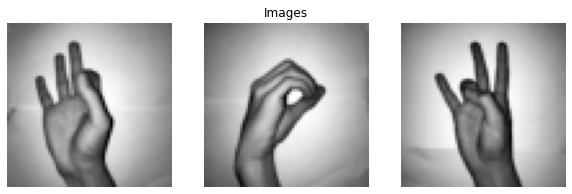

In [4]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(data_x[0], cmap='gray')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(data_x[210], cmap='gray')
plt.axis('off')
plt.title('Images')
plt.subplot(1,3,3)
plt.imshow(data_x[450], cmap='gray')
plt.axis('off')


### Reshaping the data

We need the data_x in shape (2062, 64, 64, 1) and data_y as (2062, 10) matrix format in order to use the data in Keras Library.


data_x
- 2062 is the number of images
- 64, 64 is the pixel sizes for width and height
- 1 is the channel value for greyscale (value for colored image would be 3)

data_y
- 2062 is the number of images
- 10 is the number of classes
                  


In [5]:
# numpy reshape function is used to change matrix format:
data_x = data_x.reshape(-1, 64, 64, 1)
print('New shape of data_x: ', data_x.shape)

New shape of data_x:  (2062, 64, 64, 1)


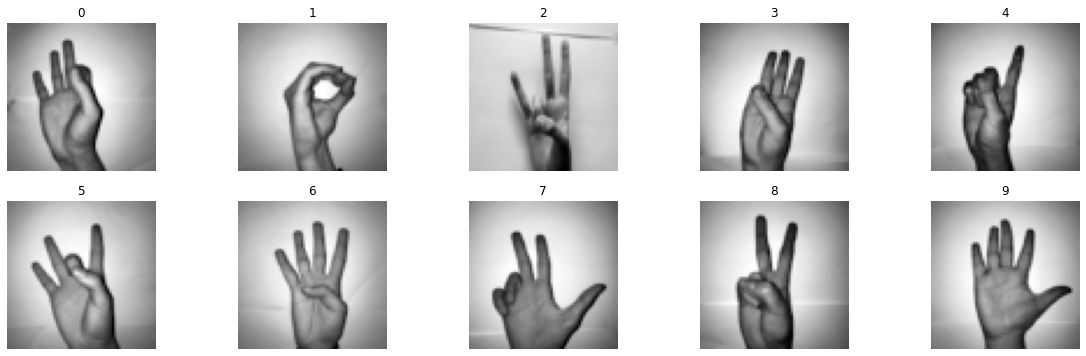

In [6]:
plt.figure(figsize=(20,6))

for i,j in enumerate([0,205,411,617,823,1030,1237,1444,1650,1858]):
    plt.subplot(2,5,i+1)
    plt.imshow(data_x[j].reshape(64,64), cmap='gray')
    plt.title(np.argmax(data_y[j]))
    plt.axis('off')

Clearly we see that the images are labeled wrongly. Since they are labeled wrong, the image predictions will also be wrong. Therefore before modeling we will apply correct labels to the images.

In [7]:
#store data array as list to count values
list_y = []
list_y = [np.where(i == 1)[0][0] for i in data_y]
count = pd.Series(list_y).value_counts()
print(count)

5    208
9    207
3    207
6    207
7    206
8    206
4    206
2    206
1    205
0    204
dtype: int64


In [8]:
X_organized = np.concatenate((data_x[204:409,:],  #number place of 0
                              data_x[822:1028,:], #number place of 1 and so on..
                              data_x[1649:1855,:],
                              data_x[1443:1649,:],
                              data_x[1236:1443,:],
                              data_x[1855:2062,:],
                              data_x[615:822,:],
                              data_x[409:615,:],
                              data_x[1028:1236,:],
                              data_x[0:204,:]),axis = 0)

### Labels Corrected

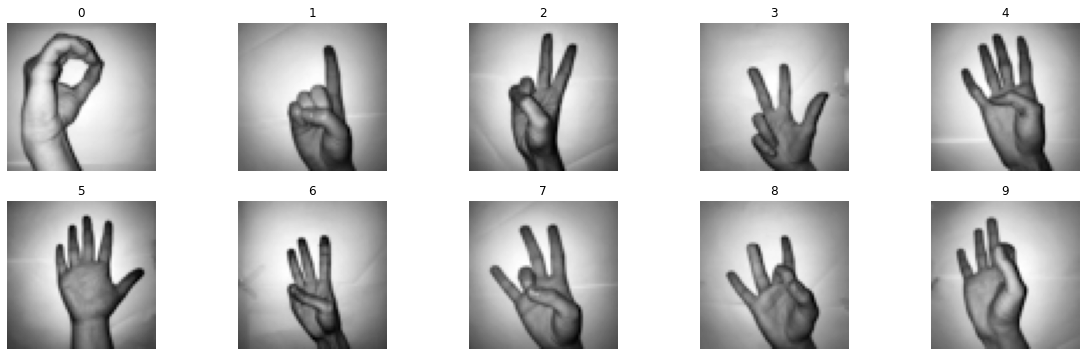

In [9]:
plt.figure(figsize=(20,6))

for i,j in enumerate([0,205,411,617,823,1030,1237,1444,1650,1858]):
    plt.subplot(2,5,i+1)
    plt.imshow(X_organized[j].reshape(64,64), cmap='gray')
    plt.title(np.argmax(data_y[j]))
    plt.axis('off')

### Data Modeling

In [10]:
#train and test split with 80% train data and 20% test data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_organized, data_y, test_size=0.20, random_state = 1)

print('Shape of x_train: ', x_train.shape)
print('Shape of y_train: ', y_train.shape)

print('Shape of x_test: ', x_test.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (1649, 64, 64, 1)
Shape of y_train:  (1649, 10)
Shape of x_test:  (413, 64, 64, 1)
Shape of y_test:  (413, 10)


# Keras

Keras is a high-level neural networks API, capable of running on top of Tensorflow, Theano, and CNTK. It enables fast experimentation through a high level, user-friendly, modular and extensible API. Keras can also be run on both CPU and GPU.

Keras was developed and is maintained by Francois Chollet and is part of the Tensorflow core, which makes it Tensorflows preferred high-level API.

With Keras it is very easy to build multiple model for the same dataset.

Installing and Importing required Libraries 

In [11]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

### Data Augmentation

Data augmentation is a technique which generates new training samples without changing labels of images. To generate new samples, some features of images are changed like brightness, rotation or zoom level. To apply it, ImageDataGenerator class is used in KERAS API. After complete the changing process, it returns new samples.

In [12]:
train_gen = ImageDataGenerator(
            rotation_range = 5,        # 5 degrees of rotation will be applied
            zoom_range = 0.5,          # 10% of zoom will be applied
            width_shift_range = 0.1,   # 10% of shifting will be applied
            height_shift_range = 0.1)  # 10% of shifting will be applied

train_gen.fit(x_train)

### Creating Model

In neural networks, Convolutional Neural Network (ConvNets or CNNs) is one of the main categories to do images recognition, images classifications. CNN image classifications takes an input image, process it and classify it under certain classes (Eg., Dog, Cat, Tiger, Lion).

In CNN, each input image will pass it through a series of convolution layers with filters (Kernels), Pooling, fully connected layers (FC) and apply Softmax function to classify an object with probabilistic values between 0 and 1. 
The CNN flow is like - Conv -> max pool -> dropout -> Conv -> max pool -> dropout -> flatten -> fully connected -> softmax


### Baseline Model

This is the baseline model for this dataset. We will compare the results of this model with other models after changing different hyperparameters to see what gives us better results

In [122]:
# Creating model structure
model = Sequential()
# Adding the first layer of CNN
model.add(Conv2D(32, kernel_size=(4,4), padding='Same', activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPool2D(pool_size=(2,2)))


# Adding the second layer of CNN
model.add(Conv2D(64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))


# Flattening the x_train data
model.add(Flatten()) 

# Creating fully connected NN with 4 hidden layers
model.add(Dense(220, activation='relu'))

model.add(Dense(150, activation='relu'))

model.add(Dense(80, activation='relu'))

model.add(Dense(10, activation='softmax'))

The parameters used to define the model are explained as such : 

- **Sequential** : It allows to build model layer by layer in a sequentail manner (The other method is by using Functional API)
- **Conv2D** : Our first two layers are Convolutional Layers that deal with out input images which are 2 Dimensional marices
- **Filter/Kernel** : The input image matrices are multiplied by the filter matrices. Convolution of an image with different filters can perform operations such as edge detection, blur and sharpen by applying filters. 32 and 64 are the number of nodes in each layer
- **Padding** : This hyperparameter (if 'Same') adds layer of zero padding around the image matrice so that the output matrix can be same as input matrix ('Valid' gives no padding around the edges) 
- **Activation** : Activation functions determine the output of a neural network. The function is attached to each neuron in the network, and determines whether it should be activated (“fired”) or not, based on whether each neuron's input is relevant for the model's prediction. (reul - rectified linear activation function is the most commonly used function)
- **Pooling** : Also referred as downsampling. It takes the filter and stride of the same size (usually 2*2).  It then applies it to the input volume and outputs the maximum number in every subregion that the filter convolves around. Pooling layers are used to reduce the dimensions of the feature maps. Thus, it reduces the number of parameters to learn and the amount of computation performed in the network.
- **Strides** : Stride controls how the filter convolves around the input volume. The filter convolves around the input volume by shifting one or two unit at a time. Stride is normally set in a way so that the output volume is an integer and not a fraction. 
- **Flatten** : Flattens the data into a vector, which will be the input vector for NN
- **Dense** : A Dense layer feeds all outputs from the previous layer to all its neurons, each neuron providing one output to the next layer. It's the most basic layer in neural networks.

**Relu** - In a neural network, the activation function is responsible for transforming the summed weighted input from the node into the activation of the node or output for that input. Relu is non-linear and has the advantage of not having any backpropagation errors unlike the sigmoid function

The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance.

**Softmax** - The softmax function is used as the activation function in the output layer of neural network models that predict a multinomial probability distribution. That is, softmax is used as the activation function for multi-class classification problems where class membership is required on more than two class labels


### Optimization

Every time a neural network finishes passing a batch through the network and generating prediction results, it must decide how to use the difference between the results it got and the values it knows to be true to adjust the weights on the nodes so that the network steps towards a solution. The algorithm that determines that step is known as the optimization algorithm.



**Adam optimizer** - Adam stands for Adaptive Moment Estimation, is an optimization algorithm that can be used instead of the classical stochastic gradient descent. Adam is an adaptive learning rate optimization algorithm that’s been designed specifically for training deep neural networks. It uses estimations of first and second moments of gradient to adapt the learning rate for each weight of the neural network.

Gradient of the cost function of neural network can be considered a random variable, since it usually evaluated on some small random batch of data. The first moment is mean, and the second moment is uncentered variance (meaning we don’t subtract the mean during variance calculation). To estimates the moments, Adam utilizes exponentially moving averages, computed on the gradient evaluated on a current mini-batch

In [123]:
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.99)

**Categorical_Crossentropy Loss Function** - Categorical crossentropy is a loss function that is used in multi-class classification tasks. These are tasks where an example can only belong to one out of many possible categories, and the model must decide which one.

The categorical crossentropy loss function calculates the loss of an example by computing the following sum: 
Loss = $ \sum\limits _{i=1} ^{N} yi * log \hat yi $

where $\hat{y}_i$ is the i-th scalar value in the model output, y_i is the corresponding target value, and output size is the number of scalar values in the model output.

This loss is a very good measure of how distinguishable two discrete probability distributions are from each other. In this context, y_i is the probability that event i occurs and the sum of all y_i is 1, meaning that exactly one event may occur. The minus sign ensures that the loss gets smaller when the distributions get closer to each other.

In [124]:
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])

**Callback:** 

The loss function chosen to be optimized for your model is calculated at the end of each epoch. We use callback function to stop training model after an optimum validation loss or validation accuracy is reached. 
For this model I have used EarlyStopping. I have chosen to monitor validation loss parameter, which is to be minimum. Verbose will print the epoch number at which the model stops training. And i have set the delay to be of 20 with patience = 20, because it is not recommended to stop training at the first optimum value.

In [125]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience= 10)

**Epoch** :

An epoch refers to one cycle through the full training dataset. The model classifies right or wrong at the end of each epoch. The model learns after each epoch as per the parameters given.

**Epochs and Batch Size**

Say you have a dataset of 10 samples. You have a batch size of 2, and you've specified you want the algorithm to run for 3 epochs. Therefore, in each epoch, you have 5 batches (10/2 = 5). Each batch gets passed through the algorithm, therefore you have 5 iterations per epoch.

So we fit the defined model with all these measures. And the model trains as per given parameters

In [23]:
history = model.fit(train_gen.flow(x_train,y_train, batch_size=150),epochs = 70, validation_data = (x_test,y_test), callbacks = es)

Epoch 1/70
11/11 [==============================] - 4s 402ms/step - loss: 2.3146 - accuracy: 0.0988 - val_loss: 2.3022 - val_accuracy: 0.0847
Epoch 2/70
11/11 [==============================] - 4s 375ms/step - loss: 2.3019 - accuracy: 0.1001 - val_loss: 2.2994 - val_accuracy: 0.1017
Epoch 3/70
11/11 [==============================] - 4s 387ms/step - loss: 2.2969 - accuracy: 0.1522 - val_loss: 2.2794 - val_accuracy: 0.2034
Epoch 4/70
11/11 [==============================] - 4s 375ms/step - loss: 2.2676 - accuracy: 0.2262 - val_loss: 2.1974 - val_accuracy: 0.2179
Epoch 5/70
11/11 [==============================] - 4s 377ms/step - loss: 2.1572 - accuracy: 0.2602 - val_loss: 1.9031 - val_accuracy: 0.3293
Epoch 6/70
11/11 [==============================] - 4s 384ms/step - loss: 1.9415 - accuracy: 0.3093 - val_loss: 1.5565 - val_accuracy: 0.3777
Epoch 7/70
11/11 [==============================] - 4s 377ms/step - loss: 1.7493 - accuracy: 0.3699 - val_loss: 1.2968 - val_accuracy: 0.5400
Epoch 

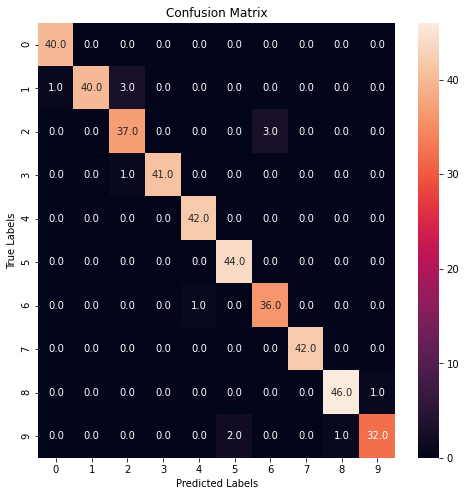

In [25]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

# First of all predict labels from x_test data set and trained model
y_pred = model.predict(x_test)

# Convert prediction classes to one hot vectors
y_pred_classes = np.argmax(y_pred, axis = 1)

# Convert validation observations to one hot vectors
y_true_classes = np.argmax(y_test, axis = 1)

# Create the confusion matrix
confmx = confusion_matrix(y_true_classes, y_pred_classes)
f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(confmx, annot=True, fmt='.1f', ax = ax)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show();

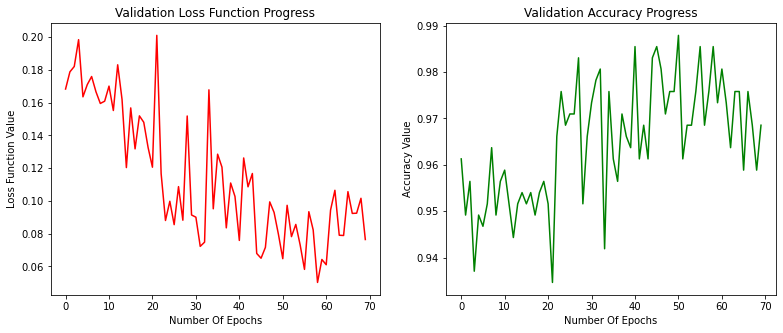

In [26]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(history.history['val_loss'], color = 'r', label = 'validation loss')
plt.title('Validation Loss Function Progress')
plt.xlabel('Number Of Epochs')
plt.ylabel('Loss Function Value')

plt.subplot(1,2,2)
plt.plot(history.history['val_accuracy'], color = 'g', label = 'validation accuracy')
plt.title('Validation Accuracy Progress')
plt.xlabel('Number Of Epochs')
plt.ylabel('Accuracy Value')
plt.show()

After Epoch 50, the loss and accuracy values fluctuate in the same range. The accuracy even drops epochs after 50 Therefore, epoch training till 50 should be enough for this dataset.

We check the results by giving test image number and having the model predict its label

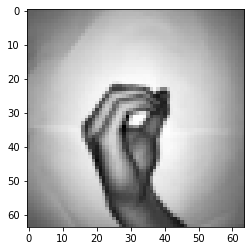

In [37]:
test_image = x_test[170]
test_image_array = test_image.reshape(64, 64)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
plt.imshow(test_image_array, cmap='gray')

The result is in form of array. We use np.argmax function to give the indice of the maximum value

In [30]:
np.argmax(result)

0

### Add dropout hyperparameter
Dropout hyperparameter is a way of preventing overfitting. It randomly neglects sample to stop the model from overfitting.
We use this hyperparameter to see if we get better result for out data

In [13]:
# Creating model structure
model2 = Sequential()
# Adding the first layer of CNN
model2.add(Conv2D(32, kernel_size=(4,4), padding='Same', activation='relu', input_shape=(64, 64, 1)))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.15))

# Adding the second layer of CNN
model2.add(Conv2D(64, kernel_size=(3,3), padding='Same', activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model2.add(Dropout(0.15))

# Flattening the x_train data
model2.add(Flatten()) 
# Creating fully connected NN with 4 hidden layers
model2.add(Dense(220, activation='relu'))
model2.add(Dropout(0.15))
model2.add(Dense(150, activation='relu'))
model2.add(Dropout(0.15))
model2.add(Dense(80, activation='relu'))
model2.add(Dropout(0.15))
model2.add(Dense(10, activation='softmax'))

In [15]:
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.99)

model2.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience= 10)

history2 = model2.fit(train_gen.flow(x_train,y_train, batch_size=150),epochs = 70, validation_data = (x_test,y_test), callbacks = es)

Epoch 1/70
11/11 [==============================] - 5s 468ms/step - loss: 2.3053 - accuracy: 0.0995 - val_loss: 2.3024 - val_accuracy: 0.1138
Epoch 2/70
11/11 [==============================] - 5s 481ms/step - loss: 2.3028 - accuracy: 0.0976 - val_loss: 2.3025 - val_accuracy: 0.0969
Epoch 3/70
11/11 [==============================] - 5s 433ms/step - loss: 2.3026 - accuracy: 0.1013 - val_loss: 2.3025 - val_accuracy: 0.0896
Epoch 4/70
11/11 [==============================] - 5s 435ms/step - loss: 2.3013 - accuracy: 0.1140 - val_loss: 2.3012 - val_accuracy: 0.1380
Epoch 5/70
11/11 [==============================] - 5s 433ms/step - loss: 2.3024 - accuracy: 0.1013 - val_loss: 2.2968 - val_accuracy: 0.1283
Epoch 6/70
11/11 [==============================] - 5s 431ms/step - loss: 2.2976 - accuracy: 0.1183 - val_loss: 2.2835 - val_accuracy: 0.2446
Epoch 7/70
11/11 [==============================] - 5s 435ms/step - loss: 2.2767 - accuracy: 0.1565 - val_loss: 2.1970 - val_accuracy: 0.3317
Epoch 

11/11 [==============================] - 5s 442ms/step - loss: 0.4019 - accuracy: 0.8678 - val_loss: 0.0929 - val_accuracy: 0.9734
Epoch 59/70
11/11 [==============================] - 7s 596ms/step - loss: 0.4033 - accuracy: 0.8714 - val_loss: 0.1006 - val_accuracy: 0.9588
Epoch 60/70
11/11 [==============================] - 5s 487ms/step - loss: 0.4131 - accuracy: 0.8617 - val_loss: 0.0877 - val_accuracy: 0.9782
Epoch 61/70
11/11 [==============================] - 6s 588ms/step - loss: 0.3927 - accuracy: 0.8830 - val_loss: 0.1042 - val_accuracy: 0.9661
Epoch 62/70
11/11 [==============================] - 5s 496ms/step - loss: 0.4023 - accuracy: 0.8757 - val_loss: 0.0993 - val_accuracy: 0.9685
Epoch 63/70
11/11 [==============================] - 7s 614ms/step - loss: 0.4246 - accuracy: 0.8745 - val_loss: 0.0978 - val_accuracy: 0.9758
Epoch 64/70
11/11 [==============================] - 7s 621ms/step - loss: 0.3968 - accuracy: 0.8720 - val_loss: 0.0845 - val_accuracy: 0.9758
Epoch 65/70

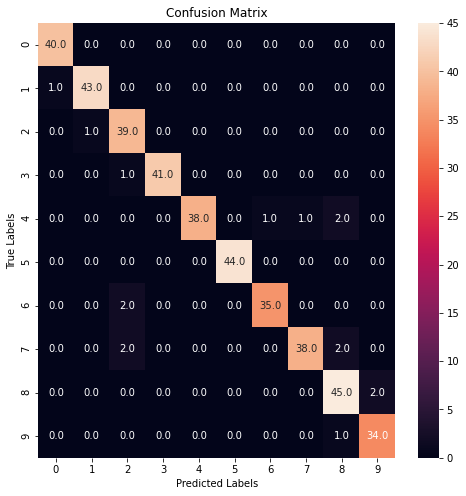

In [33]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

# First of all predict labels from x_test data set and trained model
y_pred2 = model2.predict(x_test)

# Convert prediction classes to one hot vectors
y_pred_classes = np.argmax(y_pred2, axis = 1)

# Convert validation observations to one hot vectors
y_true_classes = np.argmax(y_test, axis = 1)

# Create the confusion matrix
confmx = confusion_matrix(y_true_classes, y_pred_classes)
f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(confmx, annot=True, fmt='.1f', ax = ax)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show();

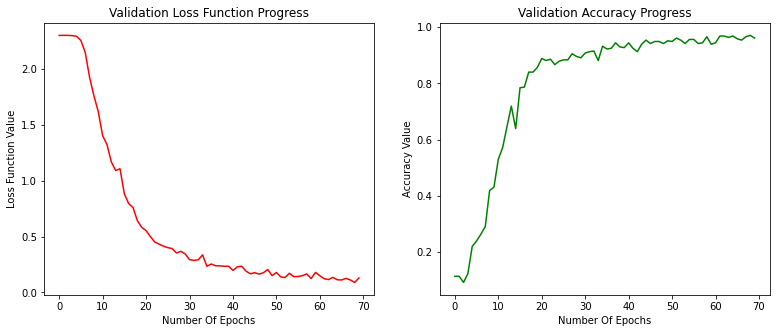

In [34]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(history2.history['val_loss'], color = 'r', label = 'validation loss')
plt.title('Validation Loss Function Progress')
plt.xlabel('Number Of Epochs')
plt.ylabel('Loss Function Value')

plt.subplot(1,2,2)
plt.plot(history2.history['val_accuracy'], color = 'g', label = 'validation accuracy')
plt.title('Validation Accuracy Progress')
plt.xlabel('Number Of Epochs')
plt.ylabel('Accuracy Value')
plt.show()

So after using the dropout function, we see that there is no significant difference between the accuracies of baseline model and the second model. However, we do see that there are less fluctuations in the validation loss and accuracy.
Therefore, having dropout hyperparameter helps with this dataset.

### Change Padding
[Reference Link 5](#5)

Next up I will change the padding to Valid. Our images do not have any information at the edges. Using Padding = Valid will filter the edges from our input images. We will then see if this enhances our result or worsens it. 
We will compare with our baseline model plus the dropout function. So we use crossentropy loss function.

In [42]:
# Creating model structure
model3 = Sequential()
# Adding the first layer of CNN
model3.add(Conv2D(32, kernel_size=(4,4), padding='Valid', activation='relu', input_shape=(64, 64, 1)))
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(Dropout(0.15))

# Adding the second layer of CNN
model3.add(Conv2D(64, kernel_size=(3,3), padding='Valid', activation='relu'))
model3.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model3.add(Dropout(0.15))

# Flattening the x_train data
model3.add(Flatten()) 

# Creating fully connected NN with 4 hidden layers
model3.add(Dense(220, activation='relu'))
model3.add(Dropout(0.15))
model3.add(Dense(150, activation='relu'))
model3.add(Dropout(0.15))
model3.add(Dense(80, activation='relu'))
model3.add(Dropout(0.15))
model3.add(Dense(10, activation='softmax'))

In [51]:
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.99)

model3.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience= 5)

history3 = model3.fit(train_gen.flow(x_train,y_train, batch_size=150),epochs = 70, validation_data = (x_test,y_test), callbacks = es)

Epoch 1/70
11/11 [==============================] - 4s 407ms/step - loss: 0.4722 - accuracy: 0.8539 - val_loss: 0.1573 - val_accuracy: 0.9540
Epoch 2/70
11/11 [==============================] - 4s 362ms/step - loss: 0.4351 - accuracy: 0.8605 - val_loss: 0.0837 - val_accuracy: 0.9709
Epoch 3/70
11/11 [==============================] - 4s 381ms/step - loss: 0.3818 - accuracy: 0.8830 - val_loss: 0.0956 - val_accuracy: 0.9637
Epoch 4/70
11/11 [==============================] - 4s 362ms/step - loss: 0.4045 - accuracy: 0.8817 - val_loss: 0.0850 - val_accuracy: 0.9806
Epoch 5/70
11/11 [==============================] - 4s 365ms/step - loss: 0.3952 - accuracy: 0.8757 - val_loss: 0.0898 - val_accuracy: 0.9637
Epoch 6/70
11/11 [==============================] - 4s 361ms/step - loss: 0.3887 - accuracy: 0.8811 - val_loss: 0.1366 - val_accuracy: 0.9492
Epoch 7/70
11/11 [==============================] - 4s 371ms/step - loss: 0.3835 - accuracy: 0.8805 - val_loss: 0.0924 - val_accuracy: 0.9661
Epoch 

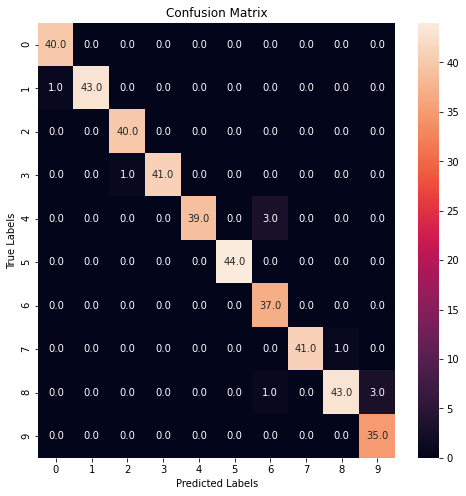

In [52]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

# First of all predict labels from x_test data set and trained model
y_pred3 = model3.predict(x_test)

# Convert prediction classes to one hot vectors
y_pred_classes = np.argmax(y_pred3, axis = 1)

# Convert validation observations to one hot vectors
y_true_classes = np.argmax(y_test, axis = 1)

# Create the confusion matrix
confmx = confusion_matrix(y_true_classes, y_pred_classes)
f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(confmx, annot=True, fmt='.1f', ax = ax)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show();

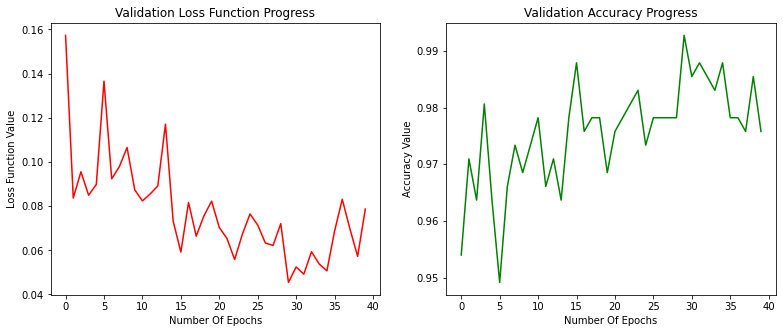

In [53]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(history3.history['val_loss'], color = 'r', label = 'validation loss')
plt.title('Validation Loss Function Progress')
plt.xlabel('Number Of Epochs')
plt.ylabel('Loss Function Value')

plt.subplot(1,2,2)
plt.plot(history3.history['val_accuracy'], color = 'g', label = 'validation accuracy')
plt.title('Validation Accuracy Progress')
plt.xlabel('Number Of Epochs')
plt.ylabel('Accuracy Value')
plt.show()

So when there is no padding around the input data, we do get a better accuracy and a early training termination at epoch 40. However, there is higher variance in validation.

### Change Loss Function
[Reference Link 4](#4)

Next I have used a different loss function - **Kullback Leibler Divergence**. It is used for multiclass classification problem. KL divergence can be used in multiclass classification problem with the sofmax function since Softmax “normalizes [data] into a probability distribution consisting of K probabilities proportional to the exponentials of the input numbers. Basically, the output tells you, for some sample 𝑥, the odds of being present in the input image. Since KL divergence works with probability distributions, it’s very much usable here.

In [39]:
optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.99)
model2.compile(optimizer = optimizer, loss = 'kullback_leibler_divergence', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience= 5)
history4 = model2.fit(train_gen.flow(x_train,y_train, batch_size=150),epochs = 50, validation_data = (x_test,y_test), callbacks = es)

Epoch 1/50
11/11 [==============================] - 5s 496ms/step - loss: 0.5757 - accuracy: 0.8023 - val_loss: 0.1157 - val_accuracy: 0.9613
Epoch 2/50
11/11 [==============================] - 5s 487ms/step - loss: 0.5142 - accuracy: 0.8296 - val_loss: 0.1119 - val_accuracy: 0.9685
Epoch 3/50
11/11 [==============================] - 5s 432ms/step - loss: 0.4561 - accuracy: 0.8514 - val_loss: 0.1088 - val_accuracy: 0.9613
Epoch 4/50
11/11 [==============================] - 5s 445ms/step - loss: 0.4737 - accuracy: 0.8423 - val_loss: 0.0986 - val_accuracy: 0.9685
Epoch 5/50
11/11 [==============================] - 6s 509ms/step - loss: 0.4436 - accuracy: 0.8557 - val_loss: 0.1077 - val_accuracy: 0.9661
Epoch 6/50
11/11 [==============================] - 5s 457ms/step - loss: 0.4357 - accuracy: 0.8605 - val_loss: 0.0978 - val_accuracy: 0.9685
Epoch 7/50
11/11 [==============================] - 6s 515ms/step - loss: 0.4620 - accuracy: 0.8514 - val_loss: 0.1005 - val_accuracy: 0.9685
Epoch 

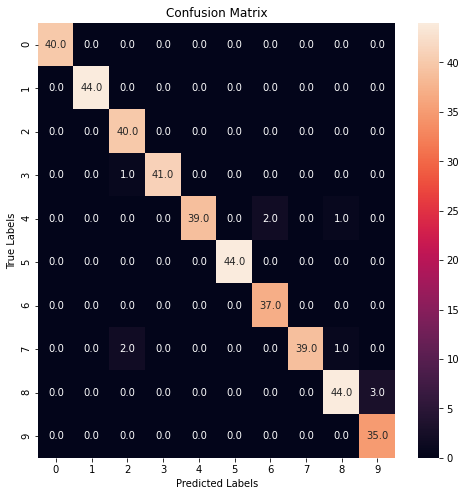

In [40]:
# First of all predict labels from x_test data set and trained model
y_pred = model2.predict(x_test)

# Convert prediction classes to one hot vectors
y_pred_classes = np.argmax(y_pred, axis = 1)

# Convert validation observations to one hot vectors
y_true_classes = np.argmax(y_test, axis = 1)

# Create the confusion matrix
confmx = confusion_matrix(y_true_classes, y_pred_classes)
f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(confmx, annot=True, fmt='.1f', ax = ax)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show();

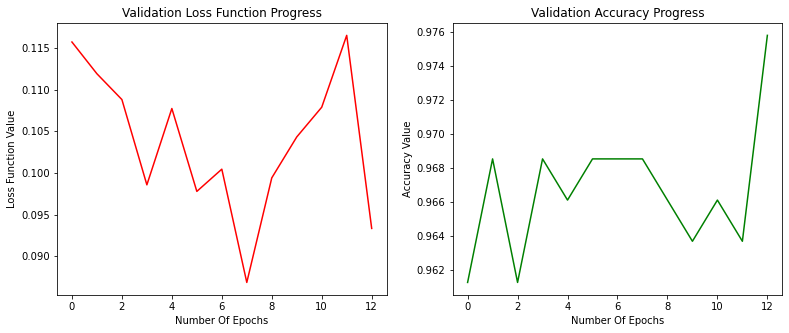

In [41]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(history4.history['val_loss'], color = 'r', label = 'validation loss')
plt.title('Validation Loss Function Progress')
plt.xlabel('Number Of Epochs')
plt.ylabel('Loss Function Value')

plt.subplot(1,2,2)
plt.plot(history4.history['val_accuracy'], color = 'g', label = 'validation accuracy')
plt.title('Validation Accuracy Progress')
plt.xlabel('Number Of Epochs')
plt.ylabel('Accuracy Value')
plt.show()

KL Divergence loss function gives us way better result than categorical entropy. The model can stop training at a very early stage and the validation loss and accuracy values are better than before.

### Change Activation Function
[Reference Link 2](#2)

**LeakyRelu** :   LeakyRelu was created to solve the problems of Relu.In Relu, there are sometimes problem where in case lots of neurons’inputs (neural networks) become negative,it simply may happen due to unfortunate random initialization, too large learning rate, high bias numbers. The reasons can be numerous, but in order to fight the situation when suddenly lot’s of neurons in the network simply do nothing ( as they always getting negative inputs and thus never activated), the Leaky ReLU arrived as an attempt to fix “dying ReLU” problem. Instead of the function being zero when x < 0, a leaky ReLU just will return some small negative number instead. Meaning, there will be a small negative slope (of 0.01, or so) in the region of negative inputs. That is, the function computes f(x)=1(x<0)(αx)+1(x>=0)(x) where α is a small constant.However, it is not always the better remedy as seen below.

In [48]:
from keras.layers import LeakyReLU

In [54]:
# Creating model structure
model4 = Sequential()
# Adding the first layer of CNN
model4.add(Conv2D(filters=20, kernel_size=(4,4), padding='Same', input_shape=(64, 64, 1)))
model4.add(LeakyReLU(alpha=0.05))
model4.add(MaxPool2D(pool_size=(2,2)))
model4.add(Dropout(0.15))

# Adding the second layer of CNN
model4.add(Conv2D(filters=30, kernel_size=(3,3), padding='Same'))
model4.add(LeakyReLU(alpha=0.05))
model4.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model4.add(Dropout(0.15))

# Flattening the x_train data
model4.add(Flatten()) 

# Creating fully connected NN with 4 hidden layers
model4.add(Dense(220))
model4.add(LeakyReLU(alpha=0.05))
model4.add(Dropout(0.15))
model4.add(Dense(150))
model4.add(LeakyReLU(alpha=0.05))
model4.add(Dropout(0.15))
model4.add(Dense(80))
model4.add(LeakyReLU(alpha=0.05))
model4.add(Dropout(0.15))
model4.add(Dense(10, activation='softmax'))

In [56]:
optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.99)
model4.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience= 10)
history5 = model4.fit(train_gen.flow(x_train,y_train, batch_size=150),epochs = 50, validation_data = (x_test,y_test), callbacks = es)


Epoch 1/50
11/11 [==============================] - 4s 343ms/step - loss: 1.1582 - accuracy: 0.5773 - val_loss: 0.4398 - val_accuracy: 0.8741
Epoch 2/50
11/11 [==============================] - 3s 304ms/step - loss: 1.0198 - accuracy: 0.6398 - val_loss: 0.3943 - val_accuracy: 0.8935
Epoch 3/50
11/11 [==============================] - 4s 344ms/step - loss: 0.9546 - accuracy: 0.6677 - val_loss: 0.3439 - val_accuracy: 0.9007
Epoch 4/50
11/11 [==============================] - 4s 334ms/step - loss: 0.8965 - accuracy: 0.6834 - val_loss: 0.3360 - val_accuracy: 0.9128
Epoch 5/50
11/11 [==============================] - 4s 348ms/step - loss: 0.8628 - accuracy: 0.7053 - val_loss: 0.3165 - val_accuracy: 0.9104
Epoch 6/50
11/11 [==============================] - 3s 308ms/step - loss: 0.8539 - accuracy: 0.7192 - val_loss: 0.2949 - val_accuracy: 0.9225
Epoch 7/50
11/11 [==============================] - 4s 328ms/step - loss: 0.7969 - accuracy: 0.7289 - val_loss: 0.2578 - val_accuracy: 0.9225
Epoch 

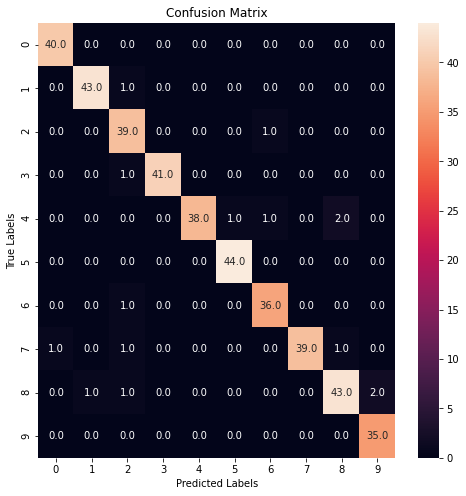

In [57]:
# First of all predict labels from x_test data set and trained model
y_pred = model4.predict(x_test)

# Convert prediction classes to one hot vectors
y_pred_classes = np.argmax(y_pred, axis = 1)

# Convert validation observations to one hot vectors
y_true_classes = np.argmax(y_test, axis = 1)

# Create the confusion matrix
confmx = confusion_matrix(y_true_classes, y_pred_classes)
f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(confmx, annot=True, fmt='.1f', ax = ax)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show();

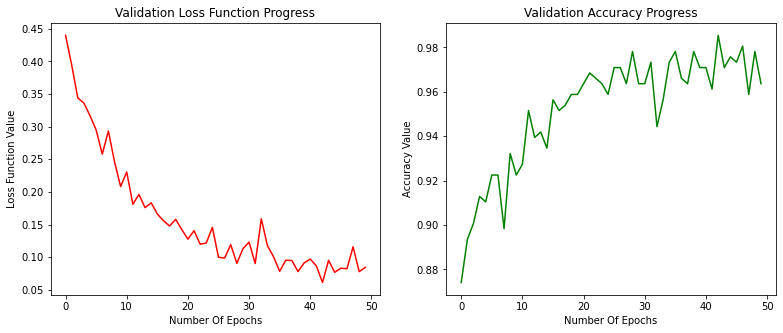

In [58]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(history5.history['val_loss'], color = 'r', label = 'validation loss')
plt.title('Validation Loss Function Progress')
plt.xlabel('Number Of Epochs')
plt.ylabel('Loss Function Value')

plt.subplot(1,2,2)
plt.plot(history5.history['val_accuracy'], color = 'g', label = 'validation accuracy')
plt.title('Validation Accuracy Progress')
plt.xlabel('Number Of Epochs')
plt.ylabel('Accuracy Value')
plt.show()

Theoretically LeakyRelu is supposed to be better, however for our dataset LeakyRelu does not better or gradual increment in accuracy for our dataset

### Change Optimizer
[Reference Link 3](#3)

**Adagrad** : Adagrad is a more advanced machine learning technique (relative to SGD) which performs gradient descent with a variable learning rate. Node weights which have historically had large gradients are given large gradients, while node weights that have historically had small gradients are given small gradients.

Thus Adagrad is effectively SGD with a per-node learning rate scheduler built into the algorithm. Adagrad thus improves on SGD by giving weights historically accurate learning rates, instead of satisfying itself with a single learning rate for all nodes. Adagrad has high momentum and moves in correct direction quicker than other Optimizers

In [59]:
from keras.optimizers import Adagrad

opt = Adagrad(lr=0.01, epsilon=1e-06, initial_accumulator_value=0.1)
model2.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience= 10)
history6 = model2.fit(train_gen.flow(x_train,y_train, batch_size=150),epochs = 50, validation_data = (x_test,y_test), callbacks = es)

Epoch 1/50
11/11 [==============================] - 5s 487ms/step - loss: 1.2277 - accuracy: 0.6737 - val_loss: 0.1289 - val_accuracy: 0.9637
Epoch 2/50
11/11 [==============================] - 7s 652ms/step - loss: 0.4544 - accuracy: 0.8532 - val_loss: 0.1032 - val_accuracy: 0.9637
Epoch 3/50
11/11 [==============================] - 7s 651ms/step - loss: 0.4290 - accuracy: 0.8648 - val_loss: 0.1115 - val_accuracy: 0.9613
Epoch 4/50
11/11 [==============================] - 5s 446ms/step - loss: 0.4260 - accuracy: 0.8617 - val_loss: 0.1012 - val_accuracy: 0.9637
Epoch 5/50
11/11 [==============================] - 6s 564ms/step - loss: 0.4407 - accuracy: 0.8636 - val_loss: 0.0839 - val_accuracy: 0.9709
Epoch 6/50
11/11 [==============================] - 6s 557ms/step - loss: 0.4435 - accuracy: 0.8508 - val_loss: 0.0882 - val_accuracy: 0.9758
Epoch 7/50
11/11 [==============================] - 6s 505ms/step - loss: 0.4131 - accuracy: 0.8654 - val_loss: 0.0839 - val_accuracy: 0.9734
Epoch 

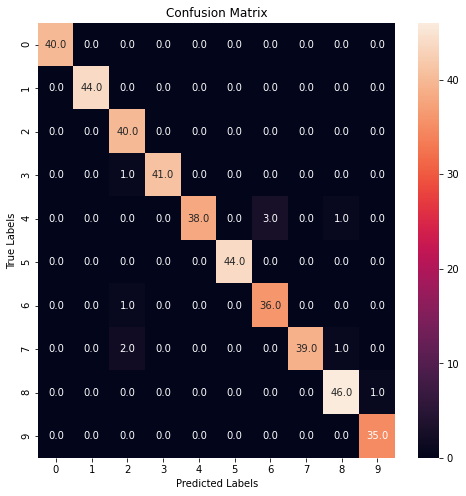

In [60]:
# First of all predict labels from x_test data set and trained model
y_pred = model2.predict(x_test)

# Convert prediction classes to one hot vectors
y_pred_classes = np.argmax(y_pred, axis = 1)

# Convert validation observations to one hot vectors
y_true_classes = np.argmax(y_test, axis = 1)

# Create the confusion matrix
confmx = confusion_matrix(y_true_classes, y_pred_classes)
f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(confmx, annot=True, fmt='.1f', ax = ax)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show();

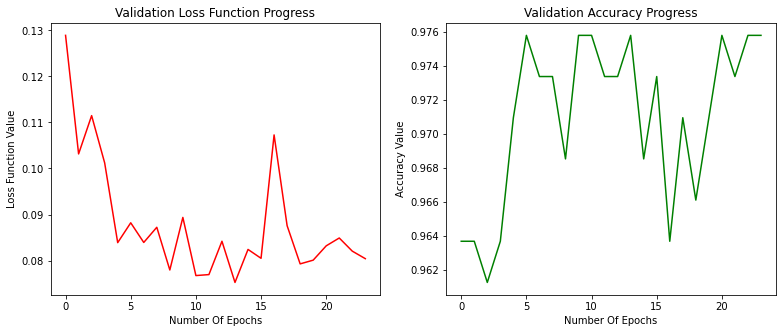

In [61]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(history6.history['val_loss'], color = 'r', label = 'validation loss')
plt.title('Validation Loss Function Progress')
plt.xlabel('Number Of Epochs')
plt.ylabel('Loss Function Value')

plt.subplot(1,2,2)
plt.plot(history6.history['val_accuracy'], color = 'g', label = 'validation accuracy')
plt.title('Validation Accuracy Progress')
plt.xlabel('Number Of Epochs')
plt.ylabel('Accuracy Value')
plt.show()

The Adagrad optimizer gives a better accuracy at a early training epoch, however the loss and accuracy values fluctuate highly. As far as model performance goes we can prefer this optimizer over Adam.

### Conclusion for Keras 

After having run and analysed different models, we can now summarise our findings. Every model has one changed hyperparameter/measure to compare the their effect and what hyperparameter/measure will be best for this dataset.
We have used patience = 10 for baseline model and model 2 with dropout. For rest patience for callback is 5

The Baseline Model has no dropout, has padding = same, Activation function = Relu, Loss function = Crossentropy and Optimizer is Adam. Model 2 is baseline model plus dropout hyperparameter. In every model I have changed one hyperparameter and kept others constant. The results are as shown below.

| Changed Hyperparameter  | Final epoch no.  | Final Validation Accuracy  | Final Validation Loss  |Inference |  |
|---|---|---|---|---|---|
|Basline model |70   |  0.9685 | 0.0764  | The result accuracy is good 
| Basline model+ Dropout  | 70  |  0.9782 |  0.0780 |  Accuracy not better than previous model, however, the validation accuracy and loss graph is gradual
|  Model2 + Padding = Valid|40   | 0.9758  |  0.0787 |  Accuracy is good, however, there is high fluctuations in accuracy and loss graph
|  Model2 + KL-divergence Loss Function |  13 | 0.9758  | 0.0933  |   Accuracy is good, however, there is high fluctuations in accuracy and loss graph
|  Model2 + Leaky-Relu Activation Function |50   |  0.9637 |  0.0844 | Models with Relu gives better accuracy, even though theoretically Leaky-Relu is a better function than Relu
|  Model2 + Adagrad Optimizer|  24 |  0.9758 |0.0804   |  Accuracy is good, however, there is high fluctuations in accuracy and loss graph


By making changes in the hyperparameters and checking for the best results for our dataset we observe that for this dataset having dropout hyperparameter, using Relu activation, using KL divergence Loss Function and using Adagrad Optimizer gives us better result for our dataset with respect to the baseline model. Padding has no significant change for our dataset , however, we would rather have padding here. 




**For Tensorflow and PyTorch we will use same hyperparameters to see how results differ from Keras.**

We will use the Model 2 from Keras which is the Baseline Model plus Dropout function.
Other hyperparameters/measures are Relu Activation function, CrossEntropy Loss, Adam Optimizer.


## Tensorflow

TensorFlow is a robust framework for machine learning and deep learning.TensorFlow is incredibly flexible and useful for your imagination. Usually, you take models from recent research literature and implement them in TensorFlow, not in Keras.

Tensorflow provides several add-on libraries and resources to deploy your production models anywhere. (provides models to experiment with)
Through multiple levels of abstraction, tensorflow gives you an easy and flexible model building experience suitable for both experts and beginners.
By using high-performance APIs, you have full control of your advanced models to quickly debug or effortlessly prototype these models. (Keras Functional API and Model Subclassing API)

In [46]:
#import tensorflow libraries
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import tensorflow as tf2
from tensorflow.python.framework import ops


Instructions for updating:
non-resource variables are not supported in the long term


In [47]:
#Flatten the data
X_train_flat = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2]).T #Flatten our data and transpose ~ (64*64,1649)
X_test_flat = x_test.reshape(x_test.shape[0],x_train.shape[1]*x_train.shape[2]).T #Flatten our data and transpose ~ (64*64,413)
Y_train = y_train.T
Y_test = y_test
print(str(X_train_flat.shape))
print(str(Y_train.shape))
print(str(X_test_flat.shape))
print(str(Y_test.shape))

(4096, 1649)
(10, 1649)
(4096, 413)
(413, 10)


### Create Model
After preparing the data, we will now build three neural network with 32 modes in first layer,  64 in second and 10 in output layer (as this being a multiclass classification problem - the images can represent any of the 0-9 digits). 

We will implement the model in following manner:
- Set up Tensorflow placeholder variables to be used later in our neural network as the train/test input matrices and classification matrices
- Initialize our weight parameters using the Glorot uniform initializer Xavier initializer), and our intercept parameters as a vector of 0's
- Define the forward propogation algorithm
- Define the loss function and add regularization factors to it
- Implement the model

A placeholder is simply a variable that we will assign data to at a later date. It allows us to create our operations and build our computation graph, without needing the data. In TensorFlow terminology, we then feed data into the graph through these placeholders

In [48]:
#Create tensorflow place holder values to be used in our model later.
def create_placeholders(n_x, n_y):
    
    X = tf.placeholder(tf.float32, [n_x, None], name="X")
    Y = tf.placeholder(tf.float32, [n_y, None], name="Y")
    
    return X, Y

The Glorot uniform initializer, also called Xavier uniform initializer.

It draws samples from a uniform distribution within [-limit, limit] where limit is sqrt(6 / (fan_in + fan_out)) where fan_in is the number of input units in the weight tensor and fan_out is the number of output units in the weight tensor.

tf.zeros_initializer() = It generates tensors initialized to 0.




In [49]:
#Let's initialize the parameters to be used in our neural network
def initialize_params():
    
    W1 = tf.get_variable("W1",[32,4096],initializer = tf2.initializers.GlorotUniform()) #We will be using the Glorot uniform initializer for our weight parameters
    b1 = tf.get_variable("b1",[32,1],initializer=tf.zeros_initializer()) #We will be using a zero vector for our intercept parameter initialization
    W2 = tf.get_variable("W2",[64,32],initializer = tf2.initializers.GlorotUniform())
    b2 = tf.get_variable("b2",[64,1],initializer=tf.zeros_initializer())
    W3 = tf.get_variable("W3",[10,64],initializer = tf2.initializers.GlorotUniform())
    b3 = tf.get_variable("b3",[10,1],initializer=tf.zeros_initializer())
    
    #Create a dictionary of our parameters to be used in forward propogation
    parameters = {"W1": W1,
                 "W2": W2,
                 "W3": W3,
                 "b1": b1,
                 "b2": b2,
                 "b3": b3}
    
    return parameters

Now, we build the forward propogation. The input data is fed in the forward direction through the network. Each hidden layer accepts the input data, processes it as per the activation function and passes to the successive layer.

The matrix multiplication operation takes the three tensors and outputs one. X variable will have the images dataset

In [50]:
#Define our forward propogation algorithm
def forward_prop(X,parameters):
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    Z1 = tf.add(tf.matmul(W1,X),b1)
    A1 = tf.nn.relu(Z1)
    Z2 = tf.add(tf.matmul(W2,A1),b2)
    A2 = tf.nn.relu(Z2)
    Z3 = tf.add(tf.matmul(W3,A2),b3)
    
    return Z3

Similar to the CNN model in Keras, we use Relu Activation Function in first couple of layers and Softmax in the output layer with regularization of L2.

Neural network regularization is a technique used to reduce the likelihood of model overfitting. There are several forms of regularization. The most common form is called L2 (Ridge) regularization.
L2 regularization works by adding a term to the error function used by the training algorithm. The additional term penalizes large weight values. Cross entropy error is most commonly used error function.

Y will contain the Labels dataset. And Z3 has the output of the last layer.

In [51]:
#Define our cost function
def cost_calc(Z3,Y,parameters):
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    W3 = parameters['W3']
    
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits,labels = labels) + 0.001*(tf.nn.l2_loss(W1) + tf.nn.l2_loss(W2) + tf.nn.l2_loss(W3)))
    
    return cost


We have all of the components of our model set up. Let's bring it all together and construct our deep learning model in the following steps:
- Call  placeholder function
- Call  parameter initialization function
- Call  forward propagation algorithm and store it in variable Z3
- Call  loss function
- Define  optimization algorithm. We will be using an Adam optimizer (same as kears) to train our parameters
- Run iterations of our algorithm to effectively train our parameters



In [52]:
#Define our neural network model
def neural_net(X_train, Y_train, X_test, Y_test, learning_rate = 0.001):

    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    (n_x, m) = X_train_flat.shape                     # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    # Create our placeholder variables of shape (n_x, n_y)
    X, Y = create_placeholders(n_x, n_y)

    # Initialize our parameters
    parameters = initialize_params()
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    Z3 = forward_prop(X, parameters)
    
    # Cost function: Add cost function to tensorflow graph
    cost = cost_calc(Z3, Y,parameters)
    
    # Backpropagation: We will be using an Adam optimizer for our backward propogation algorithm
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    
    # Initialize all the variables
    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        #Loop through 2000 iterations of our Adam optimizer to determine optimal parameters
        for i in range (1,2000):   
            a,b = sess.run([optimizer,cost],feed_dict={X: X_train, Y: Y_train})
            costs.append(b)
            
        parameters = sess.run(parameters)
        print ("Parameters have been optimized.")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
    
        
        plt.plot(np.squeeze(costs))
        plt.ylabel('Loss')
        plt.xlabel('iterations')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

    return parameters


Parameters have been optimized.
Train Accuracy: 0.40388113
Test Accuracy: 0.3220339


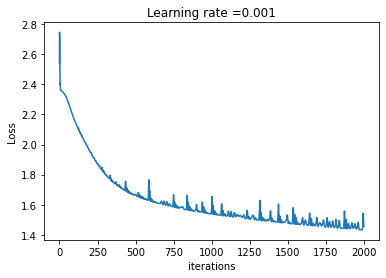

In [53]:
parameters = neural_net(X_train_flat, Y_train, X_test_flat, Y_test.T, learning_rate = 0.001,
         )

**Initially, to have hyperparameters/measure similar to the model in Keras we have used learning rate of 0.001. However, we get very poor results. So we try learning rate of 0.001**

Learning rate is a hyper-parameter that controls how much we are adjusting the weights of our network with respect the loss gradient. The lower the value, the slower we travel along the downward slope. While this might be a good idea (using a low learning rate) in terms of making sure that we do not miss any local minima, it could also mean that we’ll be taking a long time to converge 

Parameters have been optimized.
Train Accuracy: 0.995755
Test Accuracy: 0.8087167


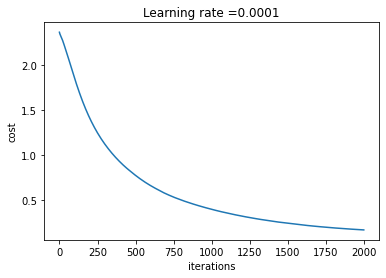

In [67]:
parameters = neural_net(X_train_flat, Y_train, X_test_flat, Y_test.T, learning_rate = 0.0001,
         )

As we can see that after changing the learning rate we get a much better result in train and test accuracy. Most of the times, it is trying of different values of learning rate to see what best fits the dataset and model.

## Conclusion for tensorflow

Following are the observations for Tensorflow :
 
- With placeholder function it is possible to build the model without having to import the data
- Modeling in tensflow is much more flexible due to placeholding and parameter assigning
- The final train accuracy for tensorflow is 99.58% and test accuracy is 80.87% which is less than the Keras model

# Pytorch

PyTorch is a Python-based library that provides functionalities such as:
- TorchScript for creating serializable and optimizable models
- Distributed training to parallelize computations
- Dynamic Computation graphs which enable to make the computation graphs on the go, and many more

Tensors in PyTorch are similar to NumPy’s n-dimensional arrays which can also be used with GPUs. Performing operations on these tensors is almost similar to performing operations on NumPy arrays. This makes PyTorch very user-friendly and easy to learn.


In [60]:
# PyTorch libraries and modules
from sklearn.metrics import accuracy_score
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam

To build a model and use the image dataset for PyTorch Framework we need to convert the test and train datasets into torch format(Tensors). 

A PyTorch Tensor is basically the same as a numpy array: it does not know anything about deep learning or computational graphs or gradients, and is just a generic n-dimensional array to be used for arbitrary numeric computation.

In [94]:
# converting training images into torch format
x_train = x_train.reshape(1649, 1, 64, 64)
x_train  = torch.from_numpy(x_train)

# converting the target into torch format
y_train = y_train.astype(int);
y_train = torch.from_numpy(y_train)

# shape of training data
x_train.shape, y_train.shape

(torch.Size([1649, 1, 64, 64]), torch.Size([1649, 10]))

In [95]:
# converting test images into torch format
x_test = x_test.reshape(413, 1, 64, 64)
x_test  = torch.from_numpy(x_test)

# converting the target into torch format
y_test = y_test.astype(int);
y_test = torch.from_numpy(y_test)

# shape of test data
x_test.shape, y_test.shape

(torch.Size([413, 1, 64, 64]), torch.Size([413, 10]))

We will use a very simple CNN architecture with just 3 convolutional layers to extract features from the images. We’ll then use a fully connected dense layers to classify those features into their respective categories.

The hyperparameters and measures used to build the architecture is similar to the Keras CNN model


In [103]:
class Net(Module):   
    def __init__(self):
        super(Net, self).__init__()

        self.cnn_layers = Sequential(
            # Defining a 2D convolution layer
            Conv2d(1, 4, kernel_size=4, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
            # Defining another 2D convolution layer
            Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
             # Defining another 2D convolution layer
            Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),

            
             )

        self.linear_layers = Sequential(
            Linear(4 * 7 * 7, 10)
        )

    # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

This is to convert our Label dataset array
to single dimension as torch does not accept multi-dimensional array

In [104]:
y_train1 = torch.argmax(y_train, dim=1)
y_test1 = torch.argmax(y_test, dim=1)

We then call the model defined above and then define Optimizer and Loss function

In [105]:
# defining the model
model = Net()
# defining the optimizer
optimizer = Adam(model.parameters(), lr= 0.001)
# defining the loss function
criterion = CrossEntropyLoss()
# checking if GPU is available
if torch.cuda.is_available():
    model = model.cuda()
    criterion = criterion.cuda()
    
print(model)

Net(
  (cnn_layers): Sequential(
    (0): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=900, out_features=10, bias=True)
  )
)


This is the architecture of the model. We have three Conv2d layers and a Linear layer. Next, we will define a function to train the model:

In [106]:
def train(epoch):
    model.train()
    tr_loss = 0
    # getting the training set
    train_x, train_y = Variable(x_train), Variable(y_train1)
    # getting the validation set
    test_x, test_y = Variable(x_test), Variable(y_test1)
    
    # converting the data into GPU format
    if torch.cuda.is_available():
        train_x = train_x.cuda()
        train_y = train_y.cuda()
        test_x = test_x.cuda()
        test_y = test_y.cuda()
        

    # clearing the Gradients of the model parameters
    optimizer.zero_grad()
    
    # prediction for training and validation set
    output_train = model(train_x)
    output_test = model(test_x)
    

    # computing the training and validation loss
    loss_train = criterion(output_train, train_y)
    loss_test = criterion(output_test, test_y)
    train_losses.append(loss_train)
    test_losses.append(loss_test)

    # computing the updated weights of all the model parameters
    loss_train.backward()
    optimizer.step()
    tr_loss = loss_train.item()
    if epoch%2 == 0:
        # printing the validation loss
        print('Epoch :', epoch, '\t', 'loss :', loss_test)

Finally, we will train the model for 70 epochs and store the training and test losses:

In [107]:
# defining the number of epochs
n_epochs = 70
# empty list to store training losses
train_losses = []
# empty list to store validation losses
test_losses = []
# training the model
for epoch in range(n_epochs):
    train(epoch)

Epoch : 0 	 loss : tensor(2.5921, grad_fn=<NllLossBackward>)
Epoch : 2 	 loss : tensor(2.2264, grad_fn=<NllLossBackward>)
Epoch : 4 	 loss : tensor(2.1189, grad_fn=<NllLossBackward>)
Epoch : 6 	 loss : tensor(1.9490, grad_fn=<NllLossBackward>)
Epoch : 8 	 loss : tensor(1.8040, grad_fn=<NllLossBackward>)
Epoch : 10 	 loss : tensor(1.6745, grad_fn=<NllLossBackward>)
Epoch : 12 	 loss : tensor(1.5400, grad_fn=<NllLossBackward>)
Epoch : 14 	 loss : tensor(1.4045, grad_fn=<NllLossBackward>)
Epoch : 16 	 loss : tensor(1.2967, grad_fn=<NllLossBackward>)
Epoch : 18 	 loss : tensor(1.2097, grad_fn=<NllLossBackward>)
Epoch : 20 	 loss : tensor(1.1258, grad_fn=<NllLossBackward>)
Epoch : 22 	 loss : tensor(1.0451, grad_fn=<NllLossBackward>)
Epoch : 24 	 loss : tensor(0.9789, grad_fn=<NllLossBackward>)
Epoch : 26 	 loss : tensor(0.9227, grad_fn=<NllLossBackward>)
Epoch : 28 	 loss : tensor(0.8681, grad_fn=<NllLossBackward>)
Epoch : 30 	 loss : tensor(0.8188, grad_fn=<NllLossBackward>)
Epoch : 32 	 

We can see that the test loss is decreasing as the epochs are increasing. Let’s visualize the training and test losses by plotting them:

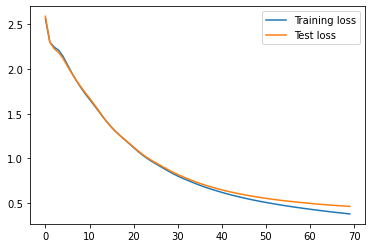

In [108]:
# plotting the training and validation loss
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Test loss')
plt.legend()
plt.show()

We see the test follows the train lossess closely which is good.
We then print the Final epoch accuracy for the train and test dataset 

In [109]:
#convert label vector into single digit
y_train2 =np.argmax(y_train, axis=1)
y_train2[1]

# prediction for train set
with torch.no_grad():
    output = model(x_train)

softmax = torch.exp(output)
prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)

# accuracy on train set
acc = accuracy_score(y_train2, predictions)
print ('Final Train accuracy;', acc)

#convert label vector into single digit
y_test2 =np.argmax(y_test, axis=1)
y_test2[1]

# prediction for test set
with torch.no_grad():
    output = model(x_test)

softmax = torch.exp(output)
prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)

# accuracy on test set
acc1 = accuracy_score(y_test2, predictions)
print ('Final Test accuracy;', acc1)

Final Train accuracy; 0.9102486355366889
Final Test accuracy; 0.864406779661017


### Conclusion for PyTorch

- To build model in pytorch the dataset must be converted in torch format, in tensors.
- The model building process is pretty straight forward, however, when we change the number of layers, we have to change(sync) the in features in last layer with the linear layer at last.
- Train and test accuracy is least best of the three frameworks

### Final Conclusion 

The results for the three frameworks are as follows:

| Library  |  Train accuracy |  Test accuracy |   |   |
|---|---|---|---|---|
| Keras  |  0.9072 | 0.9782   |   |   |
| Tensorflow | 0.9957  |  0.8087|   |   |
|  PyTorch |   0.9102|  0.8644 |   |   |

Finally, after building models in all three libraries I have following conclusions:
- Model building in Keras is much more simpler and readable compared to tensorflow and pytorch
- It is easier to build multiple models for same dataset in keras over the other two frameworks
- Keras has a slower performance comapared to tensorflow and pytorch
- Therefore tensorflow and pytorch are more suitable for large datasets that require fast execution.
- For tensorflow we can build the model first and import various datasets by calling the built model.
- Pytorch adds one more step of converting data to torch format

Finally, I would prefer Keras library as it is easy to understand and experiment with. However, for large datasets Tensorflow is preffered as it is flexible and faster.




### Code Percentage

As it is a learning assignment majority of code is adapted from various sources as citied below

- Code by self - 20%

- Code from different sources - 80%

### Citation
https://www.kaggle.com/akdagmelih/sign-language-classification-with-cnn - Kaggle notebook om same dataset  <a id="1"></a>

2) https://medium.com/@himanshuxd/activation-functions-sigmoid-relu-leaky-relu-and-softmax-basics-for-neural-networks-and-deep-8d9c70eed91e - Activation Function concept <a id="2"></a>

3) https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c - Optimizer concept  <a id="3"></a>

4) https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/ - Loss Function concept  <a id="4"></a>

5) https://stackoverflow.com/questions/37674306/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-t - Padding  <a id="5"></a>

6) https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html - Pytorch  <a id="6"></a>

7) https://www.analyticsvidhya.com/blog/2016/10/an-introduction-to-implementing-neural-networks-using-tensorflow/ - Tensorflow Tutorial <a id="6"></a>

### License

Copyright (c) 2020 Sanyukta Khanvilkar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.